# **OECD - Healthcare Investments and Hospital Stay**

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



## **Load the data**

In [5]:
df = pd.read_csv("health.csv")
print (df.shape)
df.head()

(518, 6)


,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53


## **Heatmap (Correlation) among the features**

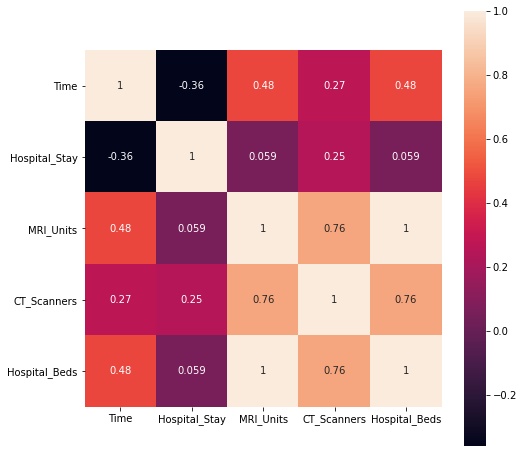

In [3]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

**It can be observed:**
1. Healthcare equipments (MRI units, CT scanners, Hospital beds) have increased over the time.
2. Hosptal Stay has decreased over the time

## **Are the time series stationary?**

### **Mean and Variance of MRI units**

In [8]:
df.Time.value_counts().sort_values()

1990     4
1991     4
1992     6
1993     7
1994     7
1995     7
1996     7
1998     7
1997     9
1999     9
2000    13
2001    14
2002    16
2003    20
2004    20
2018    22
2005    22
2006    25
2007    25
2008    25
2009    25
2016    26
2015    27
2010    28
2014    28
2017    28
2011    29
2012    29
2013    29
Name: Time, dtype: int64

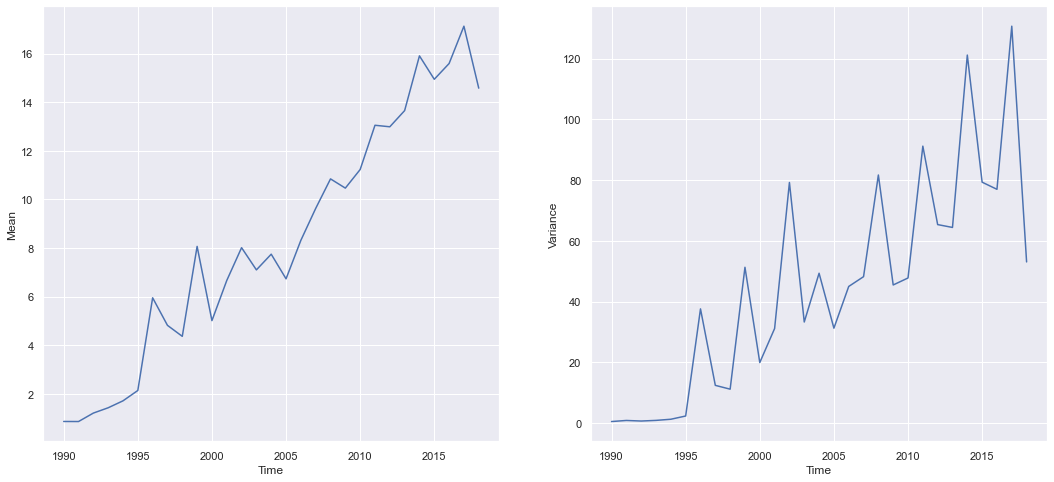

In [18]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(1,2, figsize=(18,8))
df.groupby('Time')['MRI_Units'].mean().plot(ax=ax[0], ylabel='Mean')
df.groupby('Time')['MRI_Units'].var().plot(ax=ax[1], ylabel='Variance')
plt.show()

### **Mean and Variance of CT scanners**

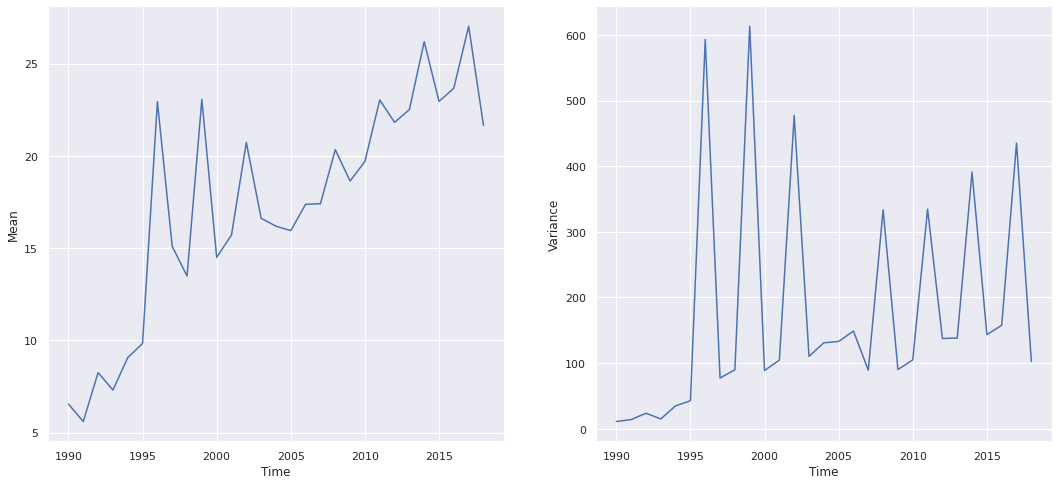

In [5]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(1,2, figsize=(18,8))
df.groupby('Time')['CT_Scanners'].mean().plot(ax=ax[0], ylabel='Mean')
df.groupby('Time')['CT_Scanners'].var().plot(ax=ax[1], ylabel='Variance')
plt.show()

### **Mean and Variance of Hospital beds**

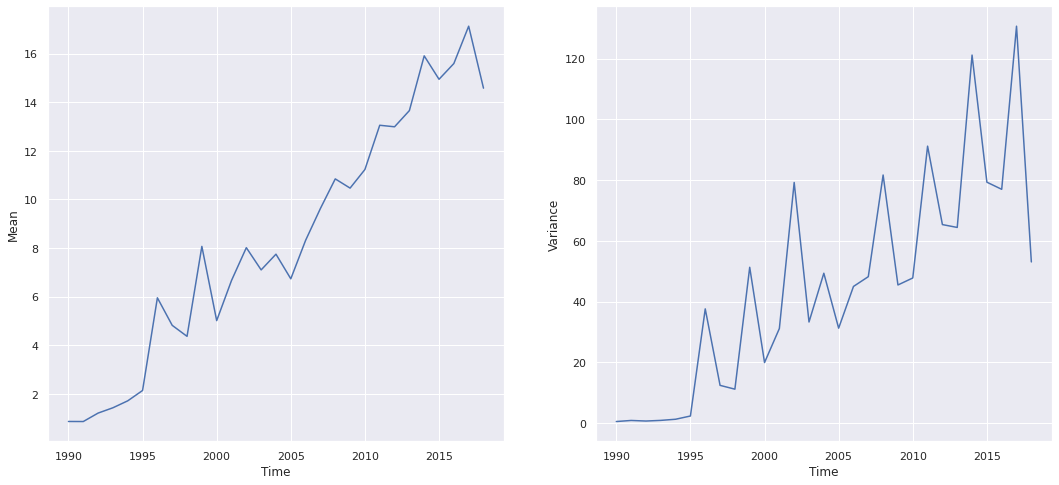

In [6]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(1,2, figsize=(18,8))
df.groupby('Time')['Hospital_Beds'].mean().plot(ax=ax[0], ylabel='Mean')
df.groupby('Time')['Hospital_Beds'].var().plot(ax=ax[1], ylabel='Variance')
plt.show()

### **Mean and Variance of Hospital stay**

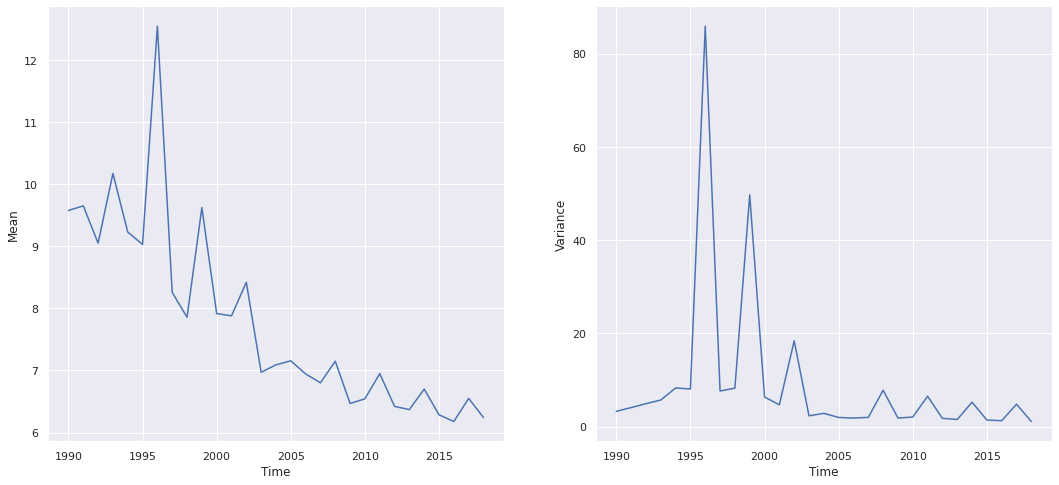

In [7]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(1,2, figsize=(18,8))
df.groupby('Time')['Hospital_Stay'].mean().plot(ax=ax[0], ylabel='Mean')
df.groupby('Time')['Hospital_Stay'].var().plot(ax=ax[1], ylabel='Variance')
plt.show()

### **Durbin Watson Test**
The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation.

In [22]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

model = ols('Time ~ Hospital_Beds', data=df).fit()
durbin_watson(model.resid)

0.3560832194838707

Here we observe an autocorrelation of ~0.32 i.e. positive autocorrelation. We can conclude that the features *Hospital Beds, CT Scanners, MRI Units, Hospital Stay* have positive autocorrelation with *Time*.

**The time series are not stationary as concluded from both the plots and Durbin Watson Test**